# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [27]:
df = pd.read_csv('../data/states_edu.csv')
df.head(10)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,NaN,NaN,488476.0,227.0,274.0,222.0,NaN
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,NaN,NaN,104321.0,218.0,263.0,213.0,NaN
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,NaN,NaN,80937.0,193.0,235.0,188.0,NaN
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,NaN,NaN,1981407.0,214.0,260.0,208.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [28]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL'
    },
    axis=1,inplace=True)
#df.isna().sum()
df.dropna(subset = ['AVG_MATH_8_SCORE'], inplace=True)
df.head(1)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *(Grade 8 Math)*

How many years of data are logged in our dataset? 

In [29]:
# @@@ 1
# Your Code
df['YEAR'].nunique()

13

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [30]:
# @@@ 2
def isGreater(Michigan, Ohio):
    if Michigan > Ohio:
        print(f'Michigan has higher 8th grade Math scores by  {Michigan - Ohio: f} points')
    elif Ohio > Michigan:
        print(f'Ohio has higher 8th grade Math scores by {Ohio - Michigan:f} points')
    else:
        print('Tied')

M = df[df['STATE'] == 'MICHIGAN']['AVG_MATH_8_SCORE'].mean()
O = df[df['STATE'] == 'OHIO']['AVG_MATH_8_SCORE'].mean()
isGreater(M, O)

Ohio has higher 8th grade Math scores by 6.083333 points


Find the average for your chosen test across all states in 2019

In [31]:
# @@@ 3
average = df[df['YEAR'] == 2019]['AVG_MATH_8_SCORE'].mean()
print(average)

281.2641509433962


For each state, find a maximum value for your chosen test score

In [32]:
# @@@ 4
scores = df.groupby('STATE')['AVG_MATH_8_SCORE'].max()
print(scores)

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   602 non-null    object 
 1   STATE                         602 non-null    object 
 2   YEAR                          602 non-null    int64  
 3   ENROLL                        397 non-null    float64
 4   TOTAL_REVENUE                 439 non-null    float64
 5   FEDERAL_REVENUE               439 non-null    float64
 6   STATE_REVENUE                 439 non-null    float64
 7   LOCAL_REVENUE                 439 non-null    float64
 8   TOTAL_EXPENDITURE             439 non-null    float64
 9   INSTRUCTION_EXPENDITURE       439 non-null    float64
 10  SUPPORT_SERVICES_EXPENDITURE  439 non-null    float64
 11  OTHER_EXPENDITURE             397 non-null    float64
 12  CAPITAL_OUTLAY_EXPENDITURE    439 non-null    float64
 13  ENRO

In [34]:
# @@@ 5
df['InstructionExpenditurePerStudent'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']
df['StateRevenuePerStudent'] = df['STATE_REVENUE'] / df['ENROLL_ALL']
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,InstructionExpenditurePerStudent,StateRevenuePerStudent
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,2.025197,2.267565
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,2.132082,2.033945
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,2.184247,2.171703
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,2.732512,3.148812
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,2.680986,2.135017


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

1: I think that out of all the expenses, Instructional expenses are the most important for students, so I am curious if the amount of instructional expense per student has any significance.
2: The other feature I created was State revenue per student. I think this may play a significant role because richer states will have larger state revenues, thus students may perform higher on benchmark exams.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'Average Instructional Expenditure per student')

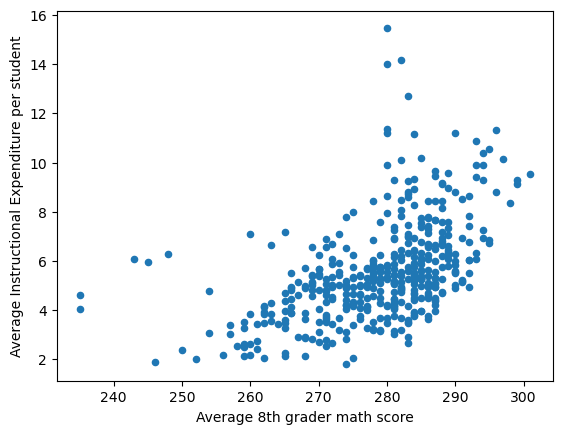

In [35]:
# @@@ 6
df.plot.scatter(x='AVG_MATH_8_SCORE', y='InstructionExpenditurePerStudent')
plt.xlabel('Average 8th grader math score')
plt.ylabel('Average Instructional Expenditure per student')

**<Relationship between the average 8th grader math score and Average Instructional Expenditure per student>**

Observation: There definitly looks to be a relationship between these two variables, but it appears to be mor exponential rather then linear.

**Visualization 2**

Text(0, 0.5, 'Average State Revenue per student')

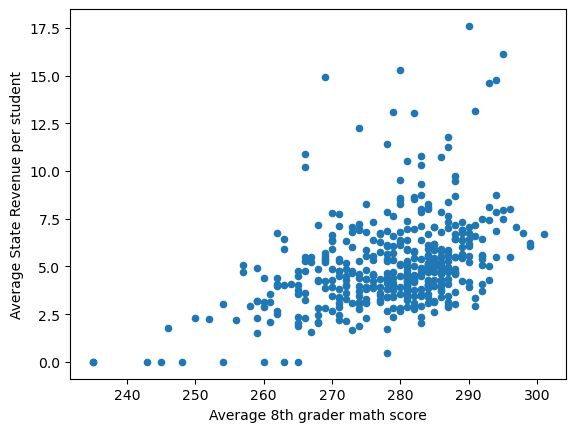

In [36]:
# @@@ 7
df.plot.scatter(x='AVG_MATH_8_SCORE', y='StateRevenuePerStudent')
plt.xlabel('Average 8th grader math score')
plt.ylabel('Average State Revenue per student')

**<Relationship between the average 8th grader math score and Average State Revenue per student>**

Observation: There looks to be a slight linear relationship between the two variables.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# @@@ 8

X = df[['InstructionExpenditurePerStudent', 'StateRevenuePerStudent', 'ENROLL_8']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.median(), inplace=True)

In [39]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [40]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [41]:
# @@@ 11
# create your model here
model = LinearRegression() 

In [42]:
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [44]:
# @@@ 12
model.score(X_test, y_test)

0.19326997844334326

In [45]:
np.mean((model.predict(X_test)-y_test)**2)**0.5

9.869782358443064

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

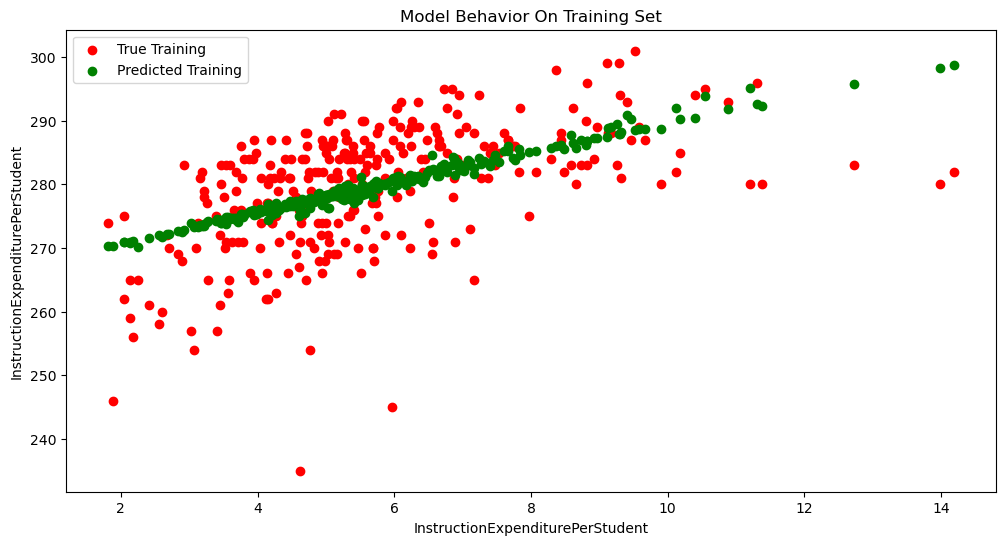

In [46]:
# @@@ 13

col_name = 'InstructionExpenditurePerStudent'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('InstructionExpenditurePerStudent')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

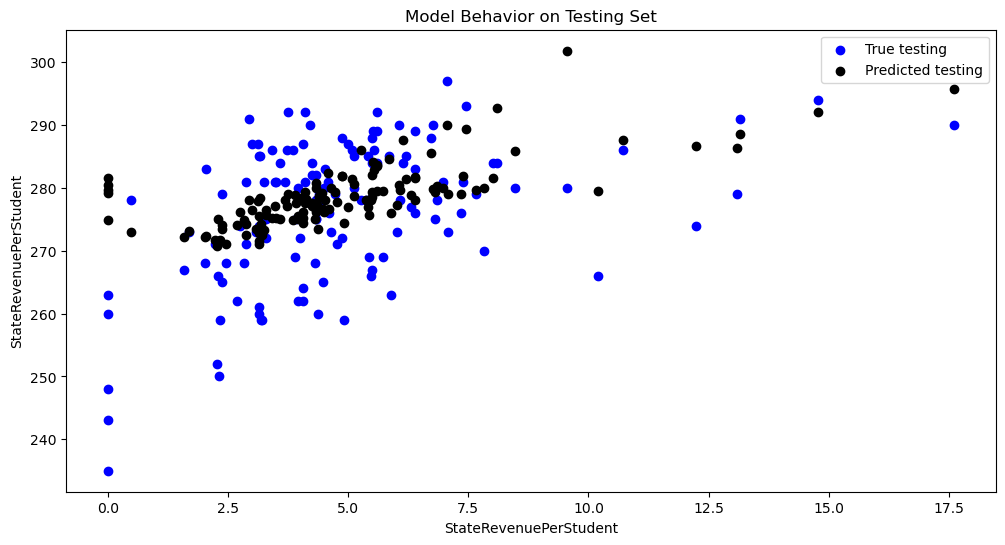

In [48]:
# @@@ 14


col_name = 'StateRevenuePerStudent'


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('StateRevenuePerStudent')
plt.title("Model Behavior on Testing Set")